<a href="https://colab.research.google.com/github/CalCorbin/CalCorbin/blob/main/Lesson_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=1,n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=4)
X += 3

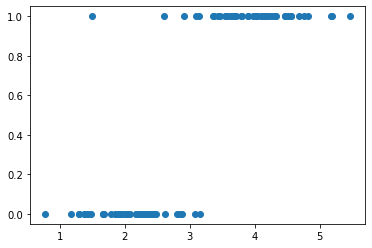

In [3]:
plt.scatter(X,y)

In [4]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [5]:
lr.coef_, lr.intercept_

(array([0.37608988]), -0.6255240905454651)

In [6]:
X_pred = np.linspace(0,5)
y_pred = X_pred*lr.coef_[0] + lr.intercept_

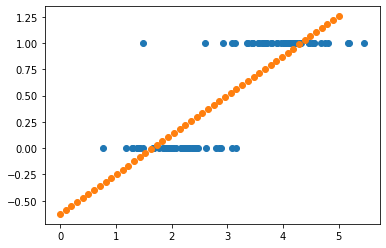

In [7]:
plt.scatter(X,y)
plt.scatter(X_pred, y_pred)

### Sigmoid Function

The sigmoid function transforms its input to be between (0, 1).

In [8]:
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

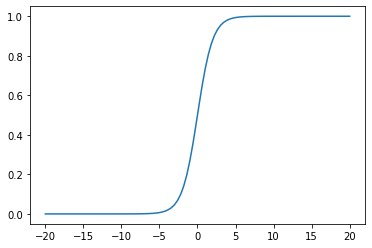

In [9]:
plt.plot(np.linspace(-20,20,100), sigmoid(np.linspace(-20,20,100)))

A linear regression equation can be passed into the sigmoid function to be able to have coefficients and a constant.

y = mx + b <br>
y = sigmoid(mx + b)

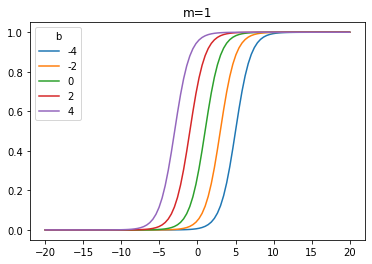

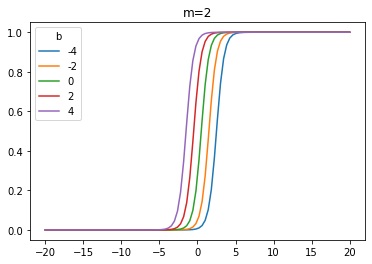

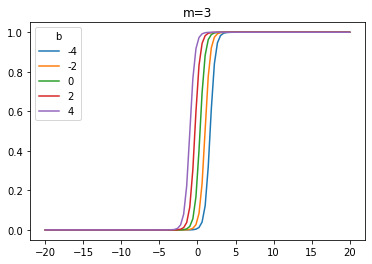

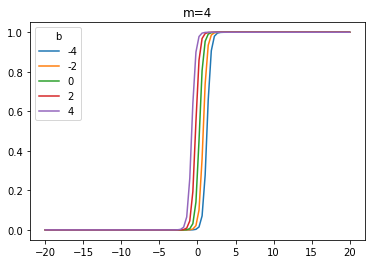

In [10]:
X_pred = np.linspace(-20,20,100)
for m in range(1,5):
    for b in range(-5,5,2):
        plt.plot(X_pred, sigmoid(X_pred*m+b))
        plt.title('m='+str(m))
        plt.legend(['-4','-2','0','2','4'],title='b')
    plt.show()

### Binary Classification with Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [13]:
lr.coef_, lr.intercept_

(array([[2.90088607]]), array([-8.57205968]))

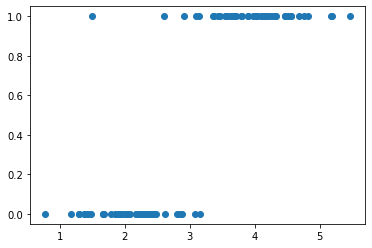

In [14]:
plt.scatter(X,y)

In [15]:
lr.predict(np.array([[2]]))

array([0])

In [16]:
X_pred = np.linspace(1, 5, 20)
y_pred = lr.predict(X_pred.reshape(-1,1))

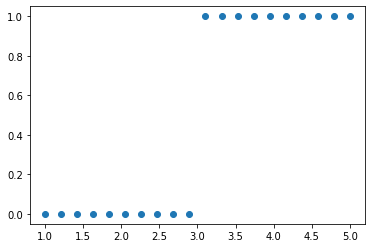

In [17]:
plt.scatter(X_pred, y_pred)

In [18]:
y_pred = lr.predict_proba(X_pred.reshape(-1, 1))

In [19]:
y_pred

array([[0.996568  , 0.003432  ],
       [0.99369734, 0.00630266],
       [0.98845337, 0.01154663],
       [0.97893877, 0.02106123],
       [0.96188629, 0.03811371],
       [0.93198632, 0.06801368],
       [0.88151926, 0.11848074],
       [0.80157759, 0.19842241],
       [0.68685799, 0.31314201],
       [0.54357862, 0.45642138],
       [0.39270524, 0.60729476],
       [0.25986549, 0.74013451],
       [0.16011392, 0.83988608],
       [0.09380014, 0.90619986],
       [0.05321124, 0.94678876],
       [0.02961192, 0.97038808],
       [0.01629878, 0.98370122],
       [0.00891606, 0.99108394],
       [0.00486091, 0.99513909],
       [0.00264517, 0.99735483]])

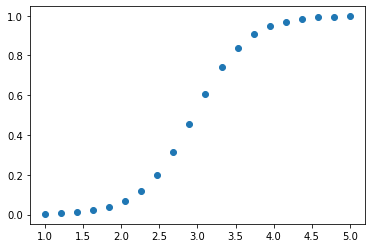

In [20]:
plt.scatter(X_pred, y_pred[:,1])

### Two features

In [21]:
X,y = make_classification(class_sep=1.5,n_samples=100, n_features=2,n_informative=2,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=222)
X = X+3

In [22]:
X.shape

(100, 2)

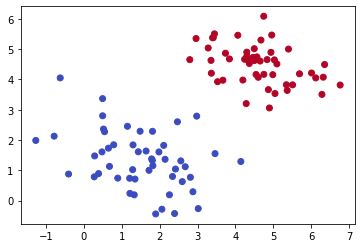

In [23]:
plt.scatter(X[:,0], X[:,1],c=y,cmap='coolwarm')

In [24]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

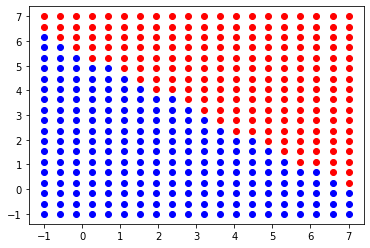

In [25]:
for i in np.linspace(-1, 7, 20):
  for j in np.linspace(-1, 7, 20):
    pred = lr.predict(np.array([[i, j]]))
    color = 'blue' if pred==0 else 'red'
    plt.scatter(i, j, c=color)

### Metrics

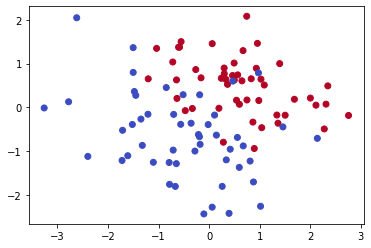

In [26]:
X,y = make_classification(class_sep=0.5,n_samples=100, n_features=2,n_informative=2,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=222)
plt.scatter(X[:,0], X[:,1],c=y,cmap='coolwarm')

In [27]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

Accuracy - $$\frac{correct}{N}$$

In [28]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.87

### When accuracy isn't enough

In [29]:
from imblearn.datasets import make_imbalance

In [30]:
X, y = make_classification(class_sep=0.75, n_samples=100, n_features=2,n_informative=2,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=222)
X, y = make_imbalance(X, y, sampling_strategy={0: 50, 1: 5})

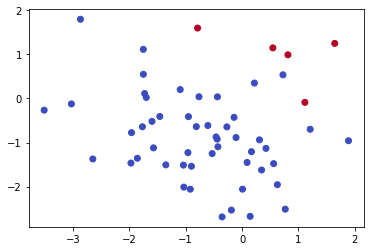

In [31]:
plt.scatter(X[:,0], X[:,1],c=y,cmap='coolwarm')

In [32]:
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
accuracy_score(y, y_pred)

0.9636363636363636

In [33]:
[i for i in y_pred if i==1]

[1, 1, 1]

What is the accuracy for the positive class?

In [35]:
[i for i in y if i==1]

[1, 1, 1, 1, 1]

In [37]:
[j for i, j in zip(y, y_pred) if i == 1]

[1, 1, 1, 0, 0]

### Confusion Matrix

<img src="https://miro.medium.com/max/1400/1*fxiTNIgOyvAombPJx5KGeA.png">

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


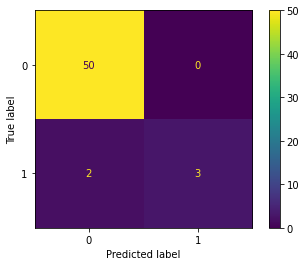

In [39]:
plot_confusion_matrix(lr, X, y)

### Precision and Recall

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/640px-Precisionrecall.svg.png">

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
precision_score(y, y_pred), recall_score(y, y_pred)

(1.0, 0.6)

### Dealing with Class Imbalance

Oversampling and Undersampling

<img src="https://cdn-images-1.medium.com/fit/t/1600/480/1*7xf9e1EaoK5n05izIFBouA.png"> 

### Homework

Train a binary classifier to predict breast cancer using this dataset https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset. <br>
<br>
Deal with class imbalance and think about what metric is most important for predictions.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data['data']
y = data['target']